### 0. Initiate

In [1]:
# !pip install quandl cryptocompare numpy
import quandl
import cryptocompare
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import datetime

### 1. Connect to Database & Get Data

In [2]:
# Set API keys or authentication tokens if required
quandl.ApiConfig.api_key = 'gF7i2vpst4243f3L7vnx'
cryptocompare_api_key = '6f37bdbf7d9fffc9e0f1907ec361d76200dfbe99816c8a1e48154f167cf2d939'

In [3]:
# Define the time period
start_date = '2015-01-21'
end_date = '2017-12-31'

In [4]:
# Fetch data from Quandl (example: 'Wiki/GOOGL')
xt_data = quandl.get('Wiki/AAPL', start_date=start_date, end_date=end_date)
xt_data

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2015-01-21,108.95,111.0600,108.270,109.55,48575897.0,0.0,1.0,103.502956,105.507464,102.856953,104.072958,48575897.0
2015-01-22,110.26,112.4700,109.720,112.40,53796409.0,0.0,1.0,104.747461,106.846970,104.234459,106.780470,53796409.0
2015-01-23,112.30,113.7500,111.530,112.98,46464828.0,0.0,1.0,106.685470,108.062976,105.953966,107.331473,46464828.0
2015-01-26,113.74,114.3626,112.800,113.10,55614979.0,0.0,1.0,108.053476,108.644948,107.160472,107.445473,55614979.0
2015-01-27,112.42,112.4800,109.030,109.14,95568749.0,0.0,1.0,106.799470,106.856470,103.578956,103.683456,95568749.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,174.68,175.4240,174.500,175.01,16052615.0,0.0,1.0,174.680000,175.424000,174.500000,175.010000,16052615.0
2017-12-26,170.80,171.4700,169.679,170.57,32968167.0,0.0,1.0,170.800000,171.470000,169.679000,170.570000,32968167.0
2017-12-27,170.10,170.7800,169.710,170.60,21672062.0,0.0,1.0,170.100000,170.780000,169.710000,170.600000,21672062.0


In [5]:
# Define X_t
xt = xt_data['Adj. Close']
xt

Date
2015-01-21    104.072958
2015-01-22    106.780470
2015-01-23    107.331473
2015-01-26    107.445473
2015-01-27    103.683456
                 ...    
2017-12-22    175.010000
2017-12-26    170.570000
2017-12-27    170.600000
2017-12-28    171.080000
2017-12-29    169.230000
Name: Adj. Close, Length: 741, dtype: float64

In [6]:
# Fetch data from CryptoCompare (example: Bitcoin in USD)
end_date = datetime.datetime(2018, 12, 31)

yt_data = cryptocompare.get_historical_price_day('BTC', currency='USD', toTs=end_date)
yt_data=  pd.DataFrame(yt_data)
yt_data

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,1421798400,229.32,207.11,210.55,43184.11,9.390362e+06,228.17,direct,
1,1421884800,238.78,225.57,228.17,53706.05,1.250831e+07,232.70,direct,
2,1421971200,236.97,224.84,232.70,38166.88,8.855407e+06,232.17,direct,
3,1422057600,248.88,229.58,232.17,33239.37,8.011743e+06,248.16,direct,
4,1422144000,256.43,241.36,248.16,50188.59,1.250965e+07,252.09,direct,
...,...,...,...,...,...,...,...,...,...
1436,1545868800,3888.92,3622.39,3848.78,81652.77,3.057291e+08,3646.09,direct,
1437,1545955200,4007.71,3628.43,3646.09,92882.41,3.537050e+08,3947.86,direct,
1438,1546041600,4004.14,3774.38,3947.86,54702.16,2.148914e+08,3797.06,direct,
1439,1546128000,3925.18,3760.80,3797.06,49797.04,1.919584e+08,3896.21,direct,


In [7]:
yt_data['date'] = pd.to_datetime(yt_data['time'].astype(int), unit='s')
yt_data.set_index('date', inplace=True)

yt_data

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
date,,,,,,,,,
2015-01-21,1421798400,229.32,207.11,210.55,43184.11,9.390362e+06,228.17,direct,
2015-01-22,1421884800,238.78,225.57,228.17,53706.05,1.250831e+07,232.70,direct,
2015-01-23,1421971200,236.97,224.84,232.70,38166.88,8.855407e+06,232.17,direct,
2015-01-24,1422057600,248.88,229.58,232.17,33239.37,8.011743e+06,248.16,direct,
2015-01-25,1422144000,256.43,241.36,248.16,50188.59,1.250965e+07,252.09,direct,
...,...,...,...,...,...,...,...,...,...
2018-12-27,1545868800,3888.92,3622.39,3848.78,81652.77,3.057291e+08,3646.09,direct,
2018-12-28,1545955200,4007.71,3628.43,3646.09,92882.41,3.537050e+08,3947.86,direct,
2018-12-29,1546041600,4004.14,3774.38,3947.86,54702.16,2.148914e+08,3797.06,direct,


In [8]:
# Define Y-T
yt=  pd.DataFrame(yt_data)['close']
yt

date
2015-01-21     228.17
2015-01-22     232.70
2015-01-23     232.17
2015-01-24     248.16
2015-01-25     252.09
               ...   
2018-12-27    3646.09
2018-12-28    3947.86
2018-12-29    3797.06
2018-12-30    3896.21
2018-12-31    3747.39
Name: close, Length: 1441, dtype: float64

### 2. Data Processing

In [9]:
# Select data points that exist in both series
combined_data = pd.merge(xt, yt, left_index=True, right_index=True, how='inner')
combined_data

,Adj. Close,close
2015-01-21,104.072958,228.17
2015-01-22,106.780470,232.70
2015-01-23,107.331473,232.17
2015-01-26,107.445473,269.18
2015-01-27,103.683456,263.27
...,...,...
2017-12-22,175.010000,13664.97
2017-12-26,170.570000,15756.56
2017-12-27,170.600000,15416.64
2017-12-28,171.080000,14398.70


In [10]:
xt = combined_data['Adj. Close']
yt = combined_data['close']

In [11]:
# Handling missing values using mean (if any)

xt = xt.fillna(xt.mean())
yt = yt.fillna(yt.mean()) 

In [12]:
# Normalizing the data
scaler = StandardScaler()
xt_scaled = scaler.fit_transform(xt.values.reshape(-1, 1))
yt_scaled = scaler.transform(yt.values.reshape(-1, 1))

### 3. Data Analysis

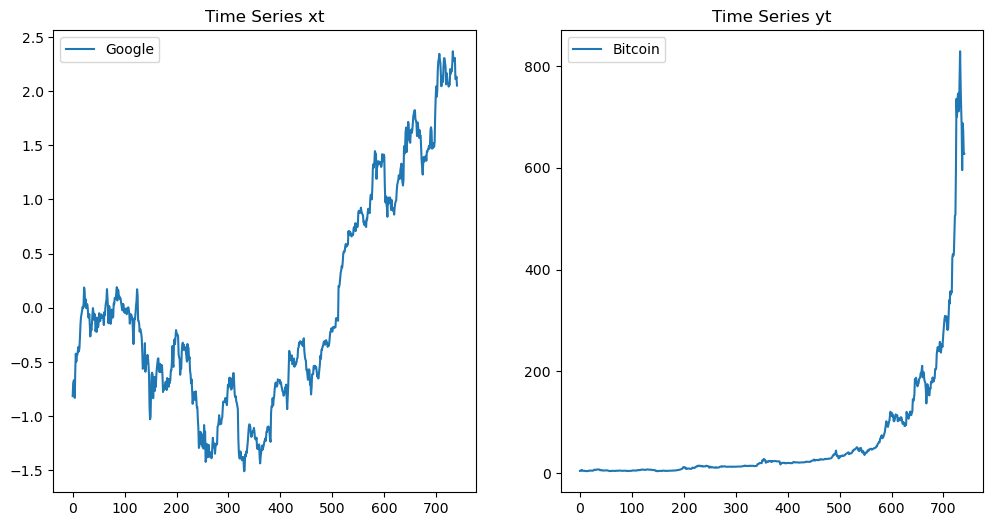

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(xt_scaled, label='Google')
plt.title('Time Series xt')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(yt_scaled, label='Bitcoin')
plt.title('Time Series yt')
plt.legend()

plt.show()

### 4. Modeling (OLS and Gradient Descent) 

#### 4.1 Standard OLS formulae

In [14]:
# Preparing the data for OLS
X = np.column_stack((np.ones(len(xt_scaled)), xt_scaled))
Y = yt_scaled

# OLS estimates: (X'X)^{-1}X'Y
beta = np.linalg.inv(X.T @ X) @ X.T @ Y

# Extracting alpha and beta
alpha = beta[0]
beta = beta[1]
yt_pred = alpha + beta * xt_scaled



# Compute Mean Squared Error
mse = np.mean((yt_pred - yt_scaled.flatten()) ** 2)
print("Mean Squared Error:", mse)



# Printing the coefficients
print(f"Alpha (Intercept): {alpha}")
print(f"Beta (Slope): {beta}")

Mean Squared Error: 23967.905475245698
Alpha (Intercept): [65.46733009]
Beta (Slope): [90.93758255]


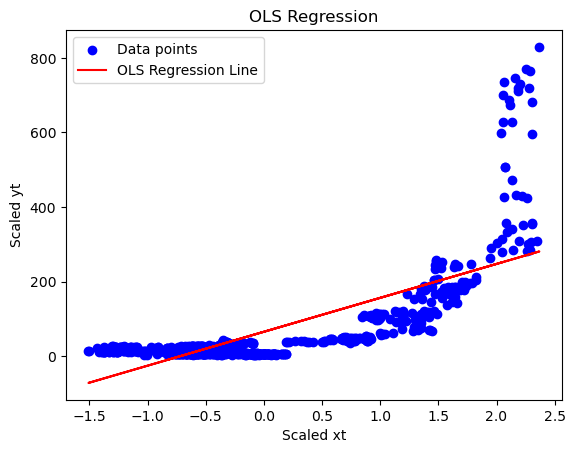

In [15]:

# Create a scatter plot of the original data (scaled)
plt.scatter(xt_scaled, yt_scaled, color='blue', label='Data points')

# Plot the regression line
# For the regression line, we use the predicted values of yt using the OLS coefficients
yt_pred = alpha + beta * xt_scaled
plt.plot(xt_scaled, yt_pred, color='red', label='OLS Regression Line')

# Adding title and labels
plt.title('OLS Regression')
plt.xlabel('Scaled xt')
plt.ylabel('Scaled yt')
plt.legend()

# Show the plot
plt.show()


#### 4.2 Gradient Descent

In [16]:
# Adding an intercept term to X
X = np.hstack([np.ones((xt_scaled.shape[0], 1)), xt_scaled])

# Initialize theta
theta = np.zeros(2)

# Gradient Descent
def gradient_descent(X, Y, theta, learning_rate=0.01, iterations=1000):
    m = len(Y)

    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - Y
        gradient = X.T.dot(errors) / m
        theta -= learning_rate * gradient

    return theta

theta_gd = gradient_descent(X, yt_scaled.flatten(), theta)


In [17]:
# Compute predictions
predictions = X.dot(theta_gd)

# Compute Mean Squared Error
mse = np.mean((predictions - yt_scaled.flatten()) ** 2)

theta_gd = gradient_descent(X, yt_scaled.flatten(), theta)

print("Mean Squared Error:", mse)
print("Alpha (Intercept):", theta_gd[0])
print("Beta (Slope):", theta_gd[1])


Mean Squared Error: 7428.617657176283
Alpha (Intercept): 65.46732996569739
Beta (Slope): 90.93758238434648


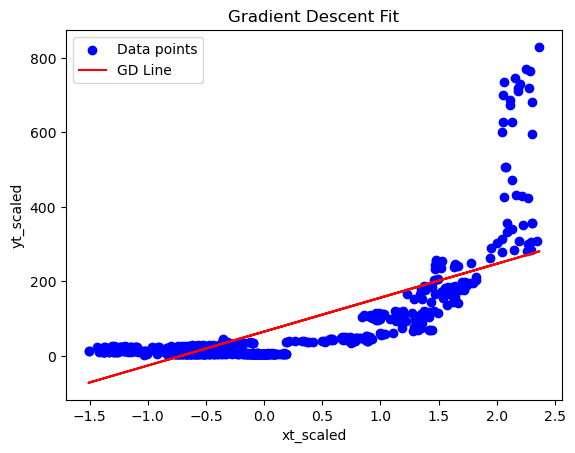

In [19]:
plt.scatter(xt_scaled, yt_scaled, color='blue', label='Data points')
plt.plot(xt_scaled, predictions, color='red', label='GD Line')
plt.xlabel('xt_scaled')
plt.ylabel('yt_scaled')
plt.title('Gradient Descent Fit')
plt.legend()
plt.show()

### 4. Explain the difficulty to obtaint Convergence to a Loss Function minimum 

#### Achieving convergence when training a model can be tricky, and several challenges may arise:

- **Complex Data Landscapes**: Just like navigating through a mountainous terrain, finding the lowest point (minimum error) in complex data can be difficult. The terrain may have many dips and valleys, which can mislead the optimization process.

- **Appropriate Steps**: If the steps taken by the optimization algorithm are not appropriately sized, it may overshoot the minimum or get stuck.

- **Starting Point**: The initial starting point can heavily influence the journey. If you start far from the actual minimum, it might take a long time to get there, or you might not get there at all